## Q3 (10 points)
เขียนคลาส Bank ในส่วนที่กำหนดให้สมบูรณ์ โดยมีฟังก์ชันต่อไปนี้
- `create_accounts(self,profiles)` ฟังก์ชันสำหรับการสร้างบัญชีธนาคาร (accounts) ตาม dictionary ที่ชื่อ profiles โดย accounts มี key เป็น ชื่อบัญชี ซึ่งเป็น key ของ profiles หนึ่ง ๆ และมี value เป็นชนิด Account ที่มียอดเงินเริ่มต้น (initial_balance) เท่ากับ value ของ profiles ที่ตรงกับชื่อบัญชีนั้น ๆ เช่น 
    - ถ้า profiles มีค่าเป็น {'Carol':1000,'Marta':-100} ดังนั้น accounts ที่เป็น dictionary ของคลาส Bank จะมีค่าเป็น {'Carol':Account object ที่มี initial_balance เป็น 1000,'Marta':Account object ที่มี initial_balance เป็น -100}
- `transfer(self,from_who,to_who,amt)` ฟังก์ชันสำหรับการโอนเงินจากบัญชีชื่อ from_who ไปที่บัญชีชื่อ to_who ด้วยจำนวน amt
- `get_names_in_debt(self)` ฟังก์ชันนี้คืนค่าเป็นลิสต์ของรายชื่อที่ติดหนี้กับธนาคาร นั่นคือยอดเงินในบัญชีติดลบ
- `update_with_interest(self)` ฟังก์ชันสำหรับการอัพเดททุกบัญชีในธนาคารด้วยการคิดดอกเบี้ยเงินฝากและดอกเบี้ยเงินกู้

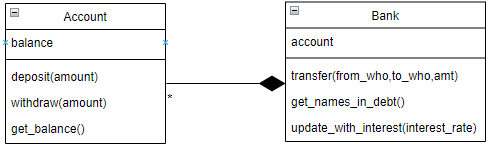

In [4]:
class Account:
    def __init__(self, initial_balance=0):
        self.__balance = initial_balance

    def deposit(self, amount):
        self.__balance += amount

    def withdraw(self, amount):
        self.__balance -= amount        

    def get_balance(self):
        return self.__balance

In [5]:
class Bank:
    def __init__(self,profiles):
        self.accounts = {} # dictionary
        self.create_accounts(profiles)
    
    def create_accounts(self, profiles):
        for k,v in profiles.items():
            self.accounts[k] = Account(v)
        
    
    def transfer(self,from_who,to_who,amt):
        self.accounts[from_who].withdraw(amt)
        self.accounts[to_who].deposit(amt)
    
    def get_names_in_debt(self):
        return [k for k,v in self.accounts.items() if v.get_balance() < 0]
    
    def update_with_interest(self,interest_rate):
        for account in self.accounts.values():
            account.deposit(account.get_balance() * (interest_rate/100))

In [6]:
'''ตรวจสอบผลลัพธ์'''
csBank = Bank({'Carol':1000,'Marta':-100})
assert csBank.accounts['Carol'].get_balance() == 1000
assert csBank.accounts['Marta'].get_balance() == -100

In [7]:
'''ตรวจสอบผลลัพธ์'''
csBank = Bank({'Carol':1000,'Marta':-100})
csBank.transfer('Carol','Marta',500)
assert csBank.accounts['Carol'].get_balance() == 500
assert csBank.accounts['Marta'].get_balance() == 400

In [8]:
'''ตรวจสอบผลลัพธ์'''
csBank = Bank({'Carol':1000,'Marta':-100})
assert csBank.get_names_in_debt() == ['Marta']

In [9]:
'''ตรวจสอบผลลัพธ์'''
csBank = Bank({'Carol':1000,'Marta':-500})
csBank.update_with_interest(1.5)
assert csBank.accounts['Carol'].get_balance() == 1015
assert csBank.accounts['Marta'].get_balance() == -507.5,  csBank.accounts['Marta'].get_balance()